# Boston_Housing_Dataset

# Import libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

# Reading data from a CSV and creating a Dataframe

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url,index_col=0)

In [3]:
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


# 1.Descriptive Statistics

In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# 1.1"Median value of owner occupied home" boxplot

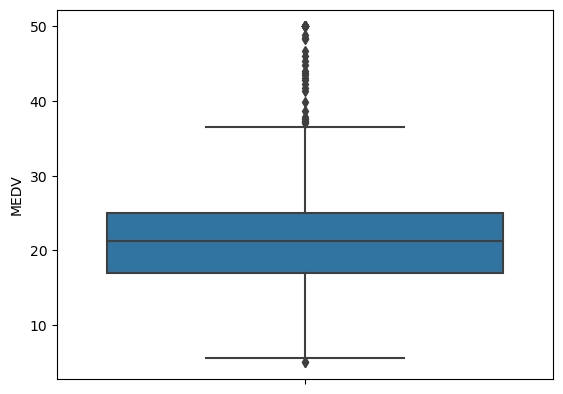

In [6]:
ax=sns.boxplot(y="MEDV", data= boston_df)

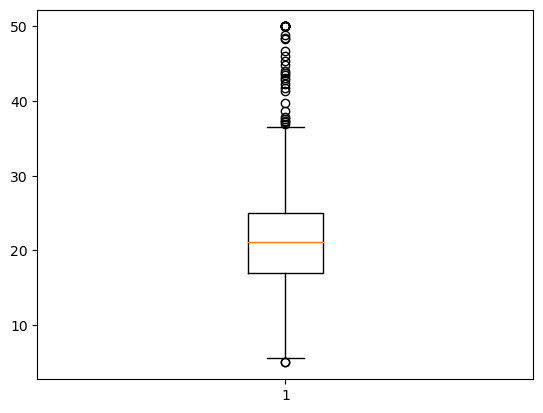

In [7]:
#To check using both libraries.
plt.boxplot(boston_df["MEDV"])
plt.show()

# 1.2 Barplot for CHAS variable.

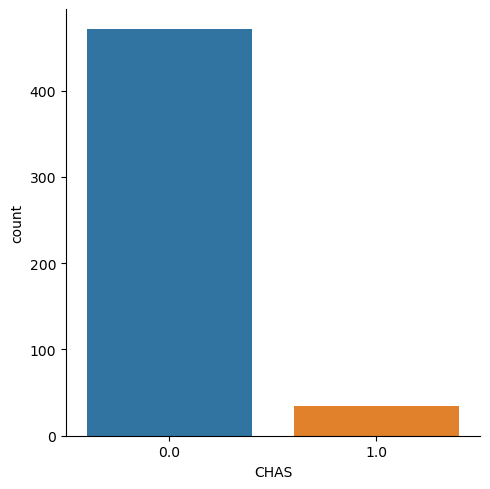

In [8]:
ax=sns.catplot(x="CHAS",kind="count", data=boston_df)
#Since CHASvariable has only two possible values it is a categorical data.

#print(boston_df[boston_df["CHAS"]==0].count())

# 1.3 Boxplot of MEDV against Age_Group.

In [9]:
boston_df.loc[(boston_df["AGE"]<=35),"Age_Group"]="35 years and younger"
boston_df.loc[(boston_df["AGE"]>35)&(boston_df["AGE"]<70),"Age_Group"]="Between 35 and 70 years"
boston_df.loc[(boston_df["AGE"]>=70),"Age_Group"]="70 years and older"

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


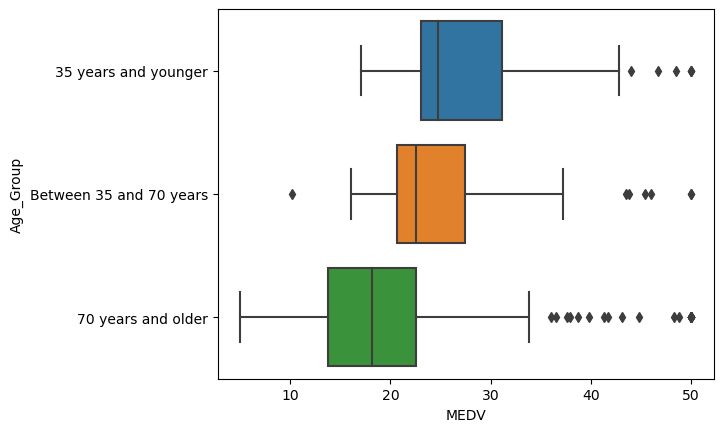

In [10]:
sns.boxplot(y="Age_Group", x="MEDV", order=["35 years and younger","Between 35 and 70 years","70 years and older"], data=boston_df)
plt.show()

# 1.4 Scatter plot of Nitric Oxide Concentration and the proportion of non-retail business acres per town.

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

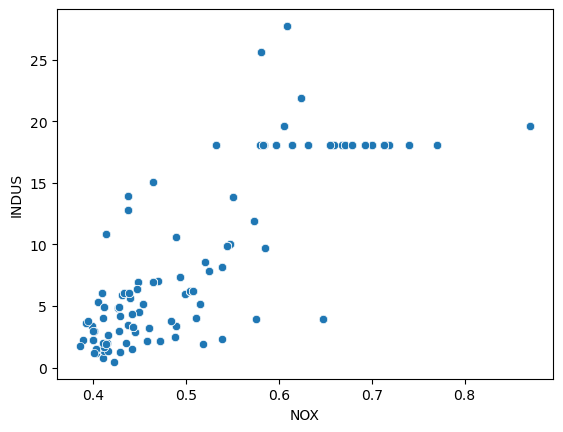

In [11]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

# 1.5Histogram for pupil to teacher ratio.

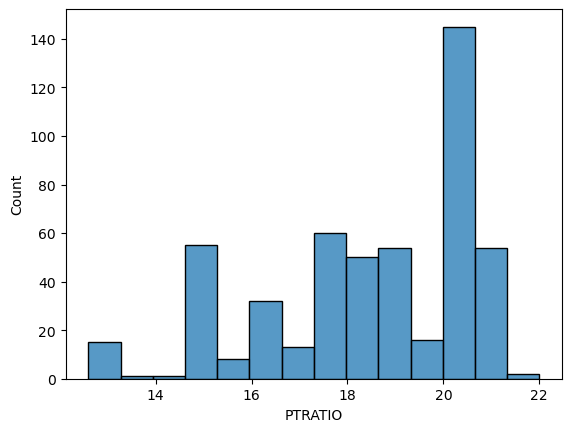

In [12]:
ax=sns.histplot(x="PTRATIO", data=boston_df, kde=False)

# 2. Hypothesis Testing 

Q 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of MEDV')]

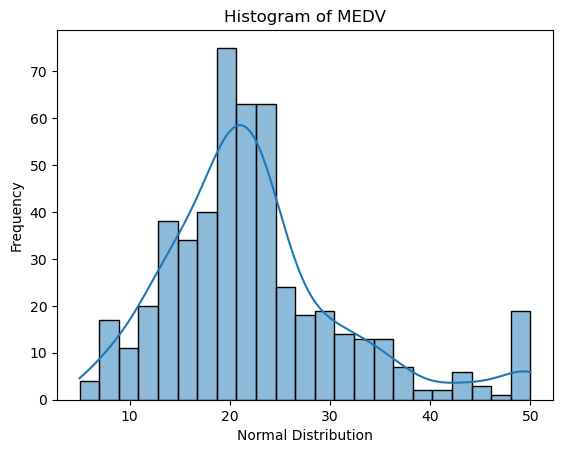

In [13]:
#Checking  the histogram of assumed dependent variable i.e Median House values "MEDV"
ax=sns.histplot(x="MEDV", kde=True, data=boston_df)
ax.set(xlabel='Normal Distribution', ylabel='Frequency',title="Histogram of MEDV")

From above histogram we can see that the "MEDV" follows almost a normal curve.

In [14]:
#Performing Levene's test to check significance of test.
scipy.stats.levene(
    boston_df[boston_df["CHAS"]==0]["MEDV"],
    boston_df[boston_df["CHAS"]==1]["MEDV"],
    center="mean"
)

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Here, p value is less than 0.5. Therefore variables dont have equal variance. i.e no homogeneous variance.

In [15]:
#T-test to check for independence.
scipy.stats.ttest_ind(
    boston_df[boston_df["CHAS"]==0]["MEDV"],
    boston_df[boston_df["CHAS"]==1]["MEDV"],
    equal_var=False
)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

# Conclusion:
Here, p value is less than 0.05. Therefore, we reject the null hypothesis and there is a significant difference between median values of houses bounded by Charles River.

Q 2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [16]:
#Test for equal variance
scipy.stats.levene(
    boston_df[boston_df["Age_Group"]=="35 years and younger"]["MEDV"],
    boston_df[boston_df["Age_Group"]=="Between 35 and 70 years"]["MEDV"],
    boston_df[boston_df["Age_Group"]=="70 years and older"]["MEDV"],
    center="mean"
)


LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [23]:
    new=boston_df[boston_df["Age_Group"]=="35 years and younger"]["MEDV"]
    mid=boston_df[boston_df["Age_Group"]=="Between 35 and 70 years"]["MEDV"]
    old=boston_df[boston_df["Age_Group"]=="70 years and older"]["MEDV"]
    #print(new)
    #print(old)
    #print(mid)

16     23.1
38     24.7
39     30.8
40     34.9
41     26.6
       ... 
349    26.6
352    18.6
354    18.2
355    20.6
495    23.1
Name: MEDV, Length: 91, dtype: float64
1      21.6
7      27.1
8      16.5
9      18.9
10     15.0
       ... 
500    16.8
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 287, dtype: float64
0      24.0
2      34.7
3      33.4
4      36.2
5      28.7
       ... 
487    20.6
493    21.8
494    24.5
498    21.2
501    22.4
Name: MEDV, Length: 128, dtype: float64


In [24]:

f_statistic, p_value = scipy.stats.f_oneway(new,mid, old, axis=0)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## Conclusion
Since p value is less than 0.05  we reject the null hupothesis and conclude that there is a significantdifference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

Q 3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [25]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.7636514469209151, 7.913361061238693e-98)

Hence, we conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [33]:
# x is independent or exploratory variable
X=boston_df["DIS"]
#y is dependent variable
y=boston_df["MEDV"]
#adding an intercept to the model
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        15:58:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion
Since, p value is less than 0.05 we reject the null hypothesis and  additional weighted distance  to the five Boston employment centres is likely to increase median house value by 1.0916 times